# Perfil de intensidad imagen completa E2

Progrma para obtener el perfil de intesidades de una imagen en blanco y negro 

Se usan las imagenes de la carpeta Malus

In [61]:
# Importamos las librerias necesarias
from pylab import * 
import numpy as np
import pandas as pd
from skimage.exposure import histogram as imhist
from skimage.color import rgb2gray 

## Analisis para una sola imagen (130°)

In [62]:
# Cargamos imagen, se convierte a matriz
image = imread('../Malus/PP9.png')
# Utilizamos shape para conocer las propiedades de nuestra matriz
print(image.shape)

(1024, 1280, 4)


En este caso la imagen tiene una resolución de 1024 x 1280 pixeles y cuenta con 4 dimensiones, tres de color RGB y una transparente.


In [63]:
# Nos aseguramos que la imagen sea un array de NumPy
image = np.array(image)

# Verificamos si la imagen tiene 4 canales
if image.shape[-1] == 4:
    # Elimina el canal alfa
    image = image[..., :3]

In [64]:
# Convertimos la imagen a escala de grises
image = rgb2gray(image)

In [65]:
# Obtenemos los histogramas
hist_image, bins_image = imhist(image)

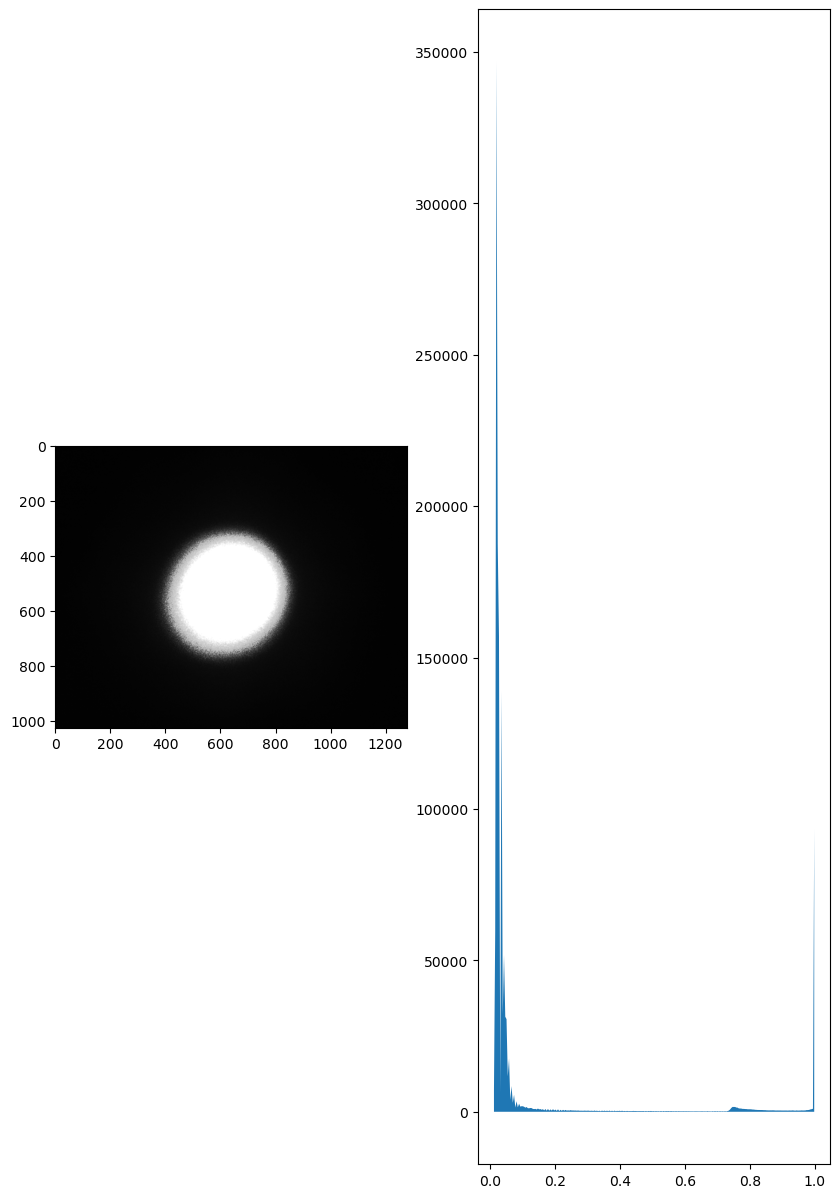

In [66]:
# Visualizamos
_, (image0, hist0), = subplots(1, 2, figsize=(10, 15))

# Original
image0.imshow(image, cmap="gray")
hist0.fill_between(bins_image, hist_image)

In [67]:
# Calculamos el promedio de intensidad
average_intensity = image.mean()

# Encontramos el valor máximo de número de píxeles y su correspondiente intensidad
max_pixel_value = hist_image.max()
max_intensity_value = bins_image[hist_image.argmax()]

print(f'Promedio de intensidad: {average_intensity}')
print(f'Punto máximo en valor de número de píxeles: {max_pixel_value}')
print(f'Máximo de intensidad: {max_intensity_value}')

Promedio de intensidad: 0.1393883228302002
Punto máximo en valor de número de píxeles: 346726
Máximo de intensidad: 0.020310260355472565


## Analisis para todas las imagenes

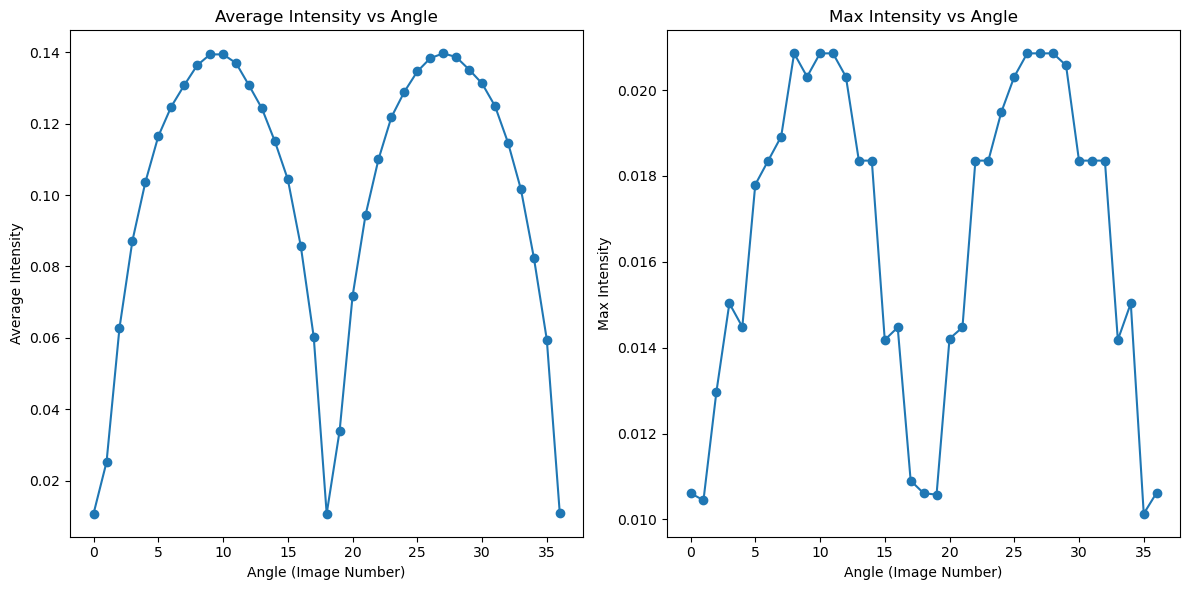

       Image  Average Intensity  Max Pixel Value  Max Intensity
0    PP0.png           0.010781          1177514       0.010612
1    PP1.png           0.025191          1049374       0.010448
2    PP2.png           0.062771           637591       0.012975
3    PP3.png           0.087199           756757       0.015034
4    PP4.png           0.103618           529402       0.014485
5    PP5.png           0.116472           419978       0.017797
6    PP6.png           0.124770           522471       0.018357
7    PP7.png           0.130748           483522       0.018917
8    PP8.png           0.136337           377989       0.020855
9    PP9.png           0.139388           346726       0.020310
10  PP10.png           0.139396           345895       0.020855
11  PP11.png           0.136962           374366       0.020855
12  PP12.png           0.130731           448501       0.020310
13  PP13.png           0.124245           528292       0.018357
14  PP14.png           0.115022         

In [68]:
# Lista para almacenar los resultados
results = []

# Recorremos las imágenes desde B0 hasta B36
for i in range(37):
    # Formateamos el nombre de la imagen
    img_path = f'../Malus/PP{i}.png'
    # Cargamos la imagen
    image = imread(img_path)
    
    # Verificamos si la imagen tiene 4 canales y eliminamos el canal alfa si es necesario
    if image.shape[-1] == 4:
        image = image[..., :3]
    
    # Convertimos la imagen a escala de grises
    image = rgb2gray(image)
    
    # Obtenemos el histograma de la imagen
    hist_image, bins_image = imhist(image)
    
    # Calculamos el promedio de intensidad
    average_intensity = image.mean()
    
    # Encontramos el valor máximo de número de píxeles y su correspondiente intensidad
    max_pixel_value = hist_image.max()
    max_intensity_value = bins_image[hist_image.argmax()]
    
    # Guardamos los resultados en la lista
    results.append({
        'Image': f'PP{i}.png',
        'Average Intensity': average_intensity,
        'Max Pixel Value': max_pixel_value,
        'Max Intensity': max_intensity_value
    })

# Convertimos los resultados a un DataFrame
df = pd.DataFrame(results)

# Graficamos el promedio de intensidad y el máximo de intensidad
angles = range(37)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(angles, df['Average Intensity'], marker='o')
plt.xlabel('Angle (Image Number)')
plt.ylabel('Average Intensity')
plt.title('Average Intensity vs Angle')

plt.subplot(1, 2, 2)
plt.plot(angles, df['Max Intensity'], marker='o')
plt.xlabel('Angle (Image Number)')
plt.ylabel('Max Intensity')
plt.title('Max Intensity vs Angle')

plt.tight_layout()
plt.show()

# Mostrar el DataFrame
print(df)


In [69]:
# Añadimos una columna con los ángulos en grados
df['Angle'] = [i * 10 for i in range(37)]

# Mostrar el DataFrame con la nueva columna
print(df)


       Image  Average Intensity  Max Pixel Value  Max Intensity  Angle
0    PP0.png           0.010781          1177514       0.010612      0
1    PP1.png           0.025191          1049374       0.010448     10
2    PP2.png           0.062771           637591       0.012975     20
3    PP3.png           0.087199           756757       0.015034     30
4    PP4.png           0.103618           529402       0.014485     40
5    PP5.png           0.116472           419978       0.017797     50
6    PP6.png           0.124770           522471       0.018357     60
7    PP7.png           0.130748           483522       0.018917     70
8    PP8.png           0.136337           377989       0.020855     80
9    PP9.png           0.139388           346726       0.020310     90
10  PP10.png           0.139396           345895       0.020855    100
11  PP11.png           0.136962           374366       0.020855    110
12  PP12.png           0.130731           448501       0.020310    120
13  PP

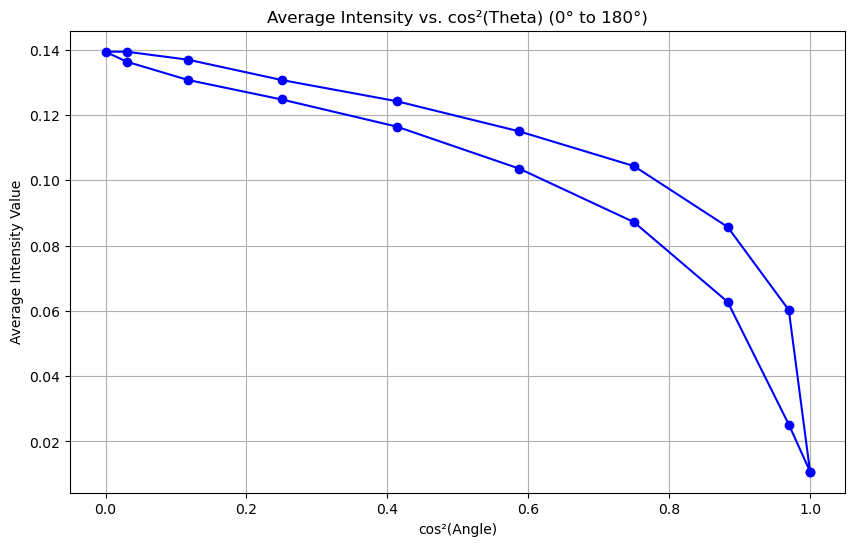

In [70]:
# Filtrar para los ángulos de 0 a 180 grados
df = df[df['Angle'] <= 180]

# Calcular cos^2(Angle) y agregarlo al DataFrame
df['cos^2(Angle)'] = np.cos(np.radians(df['Angle']))**2

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(df['cos^2(Angle)'], df['Average Intensity'], marker='o', linestyle='-', color='b')
plt.xlabel('cos²(Angle)')
plt.ylabel('Average Intensity Value')
plt.title('Average Intensity vs. cos²(Theta) (0° to 180°)')
plt.grid(True)
plt.show()

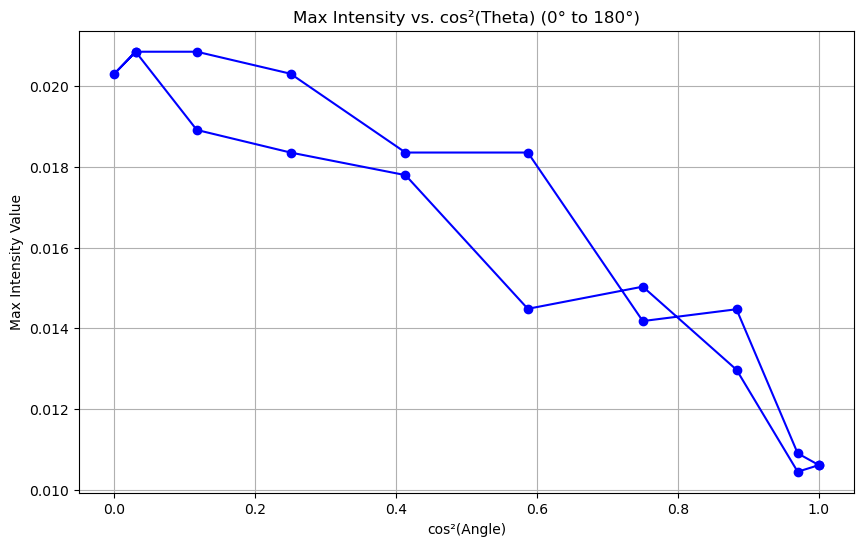

In [72]:
# Filtrar para los ángulos de 0 a 180 grados
df = df[df['Angle'] <= 180]

# Calcular cos^2(Angle) y agregarlo al DataFrame
df['cos^2(Angle)'] = np.cos(np.radians(df['Angle']))**2

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(df['cos^2(Angle)'], df['Max Intensity'], marker='o', linestyle='-', color='b')
plt.xlabel('cos²(Angle)')
plt.ylabel('Max Intensity Value')
plt.title('Max Intensity vs. cos²(Theta) (0° to 180°)')
plt.grid(True)
plt.show()